# Importacion de librerias y dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ruta = '/content/drive/My Drive/minería de datos/tarea 4. 100% rial no fake'

#### Este dataset contiene 76 atributos, pero todos los experimentos publicados se refieren a la utilización de un subconjunto de 14 de ellos. El campo "meta" se refiere a la presencia de una enfermedad cardíaca en el paciente.

##### [Heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/) <- link


##### age => age in years
##### sex => (1 = male; 0 = female)
##### cp => tipo de dolor en el pecho
##### trestbps => presión arterial en reposo (en mm Hg al ingreso al hospital)
##### chol => suero colestoral en mg / dl
##### fbs => (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
##### restecg => Resultados electrocardiográficos en reposo
##### thalach => frecuencia cardíaca máxima alcanzada
##### exang => angina inducida por ejercicio (1 = sí; 0 = no)
##### oldpeak => Depresión del ST inducida por el ejercicio relativo al descanso
##### slope => la pendiente del segmento ST del ejercicio máximo
##### ca => número de buques principales (0-3) coloreados por la flotación
##### thal => 3 = normal; 6 = fixed defect; 7 = reversable defect
##### target =>  diagnóstico de enfermedad cardíaca (estado de la enfermedad angiográfica)
#### -- Valor 0: <50% de reducción de diámetro
#### -- Valor 1: > 50% de estrechamiento del diámetro 

In [ ]:
ef = open('%s/heart.csv'%ruta)
dataframe = pd.read_csv(ef)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


####Se elimina el target de la data y se crea un dataframe solo con el target

In [ ]:
target = pd.DataFrame(dataframe['target'])
dataframe = dataframe.drop(['target'], axis=1)

# KNN ( k-nearest neighbors)

## En el primer Cluster con 3 separaciones se analiza la relacion entre presión arterial en reposo en mm Hg al ingreso al hospital (trestbps) en conjunto con frecuencia cardíaca máxima alcanzada (thalach)

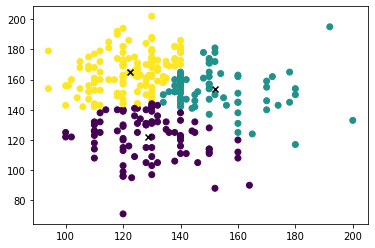

In [ ]:
kmeans = cluster.KMeans(3)
kmeans.fit(dataframe[['trestbps', 'thalach']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(dataframe['trestbps'], dataframe['thalach'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

####Se guarda el registro de en que cluster queda cada dato junto con el cluster

In [ ]:
target['KNN3'] = kmeans.labels_
target

,target,KNN3
0,1,1
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
298,0,0
299,0,0
300,0,1
301,0,0


In [ ]:
centroids

array([[128.68888889, 121.98888889],
       [152.14666667, 153.89333333],
       [122.38405797, 165.37681159]])

In [ ]:
centroids[:,1]

array([121.98888889, 153.89333333, 165.37681159])

## En el Cluster con 4 separaciones se analiza la relacion ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak'] con los ejes ['trestbps,'thalach'] donde la relación no es clara, y lo mas probable es que haya que escalar los datos para obtener una mejor conclucion :)

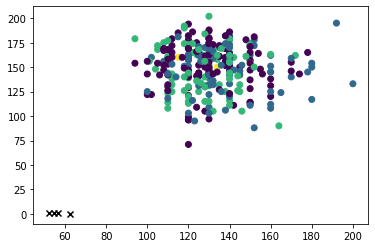

[[5.44960630e+01 7.08661417e-01 1.01574803e+00 1.29913386e+02
  2.44118110e+02 1.33858268e-01 5.03937008e-01 1.52874016e+02
  2.91338583e-01 8.96062992e-01]
 [5.65324675e+01 6.36363636e-01 8.44155844e-01 1.38272727e+02
  3.02025974e+02 1.68831169e-01 4.67532468e-01 1.45077922e+02
  4.28571429e-01 1.16493506e+00]
 [5.19787234e+01 7.23404255e-01 1.01063830e+00 1.28265957e+02
  1.93276596e+02 1.48936170e-01 6.38297872e-01 1.48712766e+02
  2.97872340e-01 1.08510638e+00]
 [6.26000000e+01 0.00000000e+00 8.00000000e-01 1.35800000e+02
  4.38200000e+02 2.00000000e-01 0.00000000e+00 1.55600000e+02
  2.00000000e-01 1.90000000e+00]]


In [ ]:
kmeans = cluster.KMeans(4)
kmeans.fit(dataframe[['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(dataframe['trestbps'], dataframe['thalach'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()
print(centroids)

In [ ]:
target['KNN4'] = kmeans.labels_

## En el Cluster con 5 separaciones se analiza la relacion entre presión arterial en reposo en mm Hg al ingreso al hospital (trestbps) en conjunto con frecuencia cardíaca máxima alcanzada (thalach)

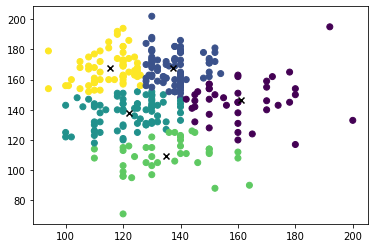

In [ ]:
# Con los centroides

kmeans = cluster.KMeans(5)
kmeans.fit(dataframe[['trestbps', 'thalach']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(dataframe['trestbps'], dataframe['thalach'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

In [ ]:
target['KNN5'] = kmeans.labels_

## En el Cluster con 6 separaciones se analiza la relacion entre presión arterial en reposo en mm Hg al ingreso al hospital (trestbps) en conjunto con frecuencia cardíaca máxima alcanzada (thalach)

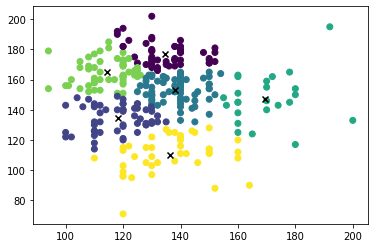

In [ ]:
kmeans = cluster.KMeans(6)
kmeans.fit(dataframe[['trestbps', 'thalach']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(dataframe['trestbps'], dataframe['thalach'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

In [ ]:
target['KNN6'] = kmeans.labels_

####Podemos ver una muestra del target con las separaciones de los correspondientes KNN

In [ ]:
target.sample(20)

,target,KNN3,KNN4,KNN5,KNN6
262,0,0,1,3,5
257,0,0,2,3,5
281,0,2,2,1,2
200,0,2,2,4,4
189,0,2,2,4,4
297,0,0,2,3,5
139,1,0,0,3,5
293,0,1,2,0,2
170,0,0,0,2,1
110,1,1,1,0,3


#Agrupaciones Jerarquicas
## Se saca una muestra de la data total

In [ ]:
corazon = dataframe.sample(20)
corazon

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


## Chol(colesterol) se ocupa como indicador que marca las distancias entre los datos, mientras que las etiquetas o datos corresponde a la edad de las personas (Age)

#### Indicador = suero colestoral en mg / dl (chol)
#### Etiqueta = Edad (Age)


In [ ]:
distancias = linkage(corazon[['age'	,'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang'	,'oldpeak' ]].values, 'average')
etiquetas = corazon.age.values

In [ ]:
etiquetas

array([58, 67, 60, 50, 44, 48, 54, 51, 49, 45, 58, 65, 57, 41, 58, 47, 42,
       55, 67, 55])

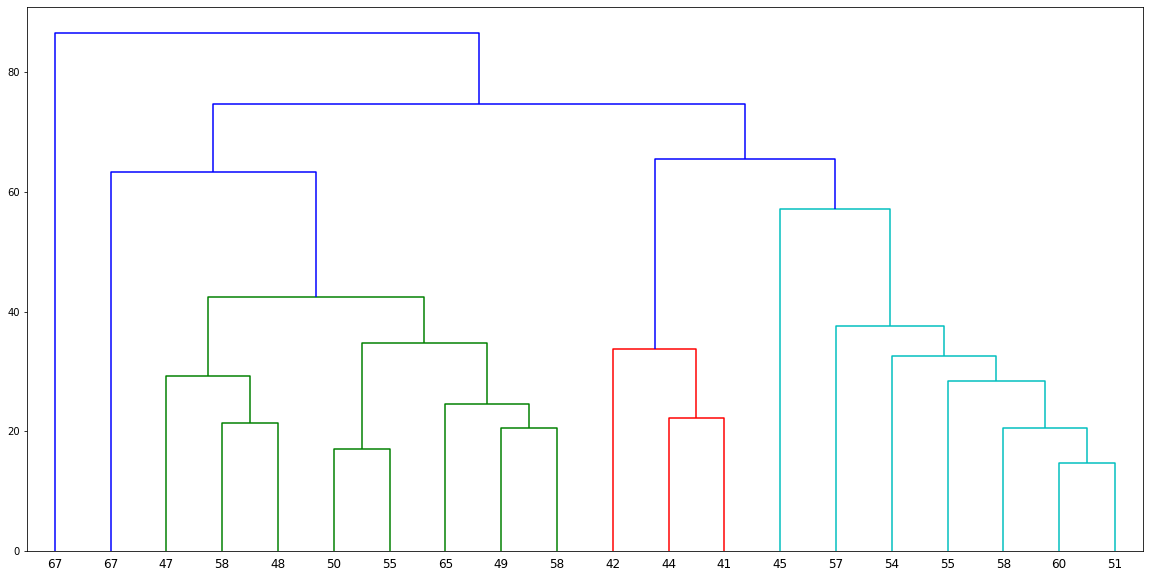

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()  

#### Indicador = presión arterial en reposo (en mm Hg al ingreso al hospital) (trestbps)
#### Etiqueta = Edad (Age)


In [ ]:
distancias = linkage(corazon[['age'	,'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang'	,'oldpeak']].values, 'complete', metric='euclidean')

etiquetas = corazon.age.values

In [ ]:
etiquetas

array([58, 67, 60, 50, 44, 48, 54, 51, 49, 45, 58, 65, 57, 41, 58, 47, 42,
       55, 67, 55])

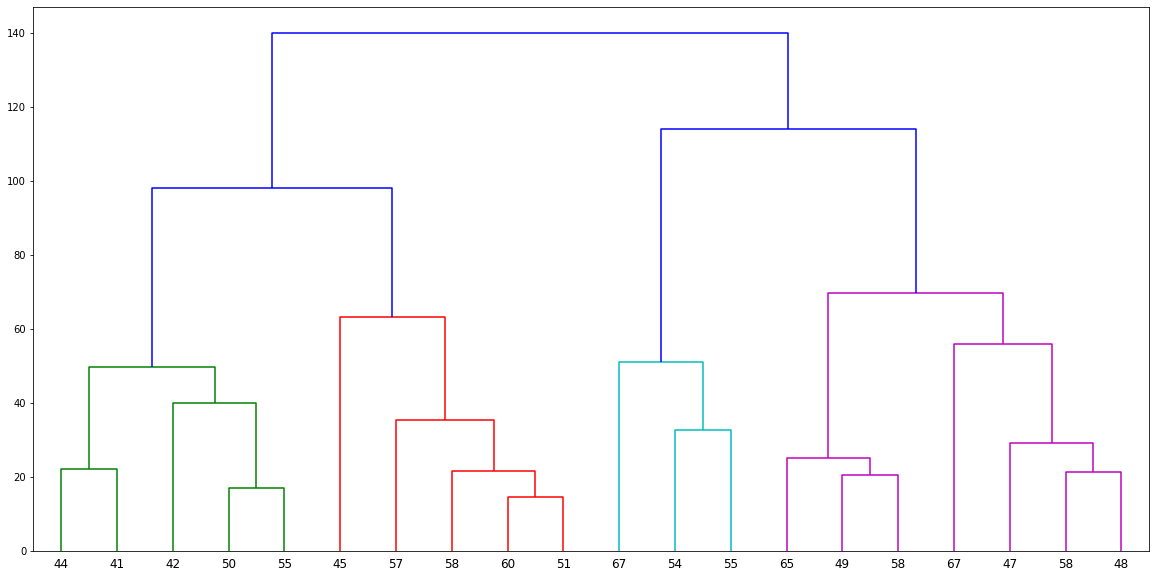

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()  

#### Indicador = frecuencia cardíaca máxima alcanzada (thalach)
#### Etiqueta = Edad (Age)

In [ ]:
distancias = linkage(corazon[['age'	,'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang'	,'oldpeak']].values, 'single')
etiquetas = corazon.age.values

In [ ]:
etiquetas

array([58, 67, 60, 50, 44, 48, 54, 51, 49, 45, 58, 65, 57, 41, 58, 47, 42,
       55, 67, 55])

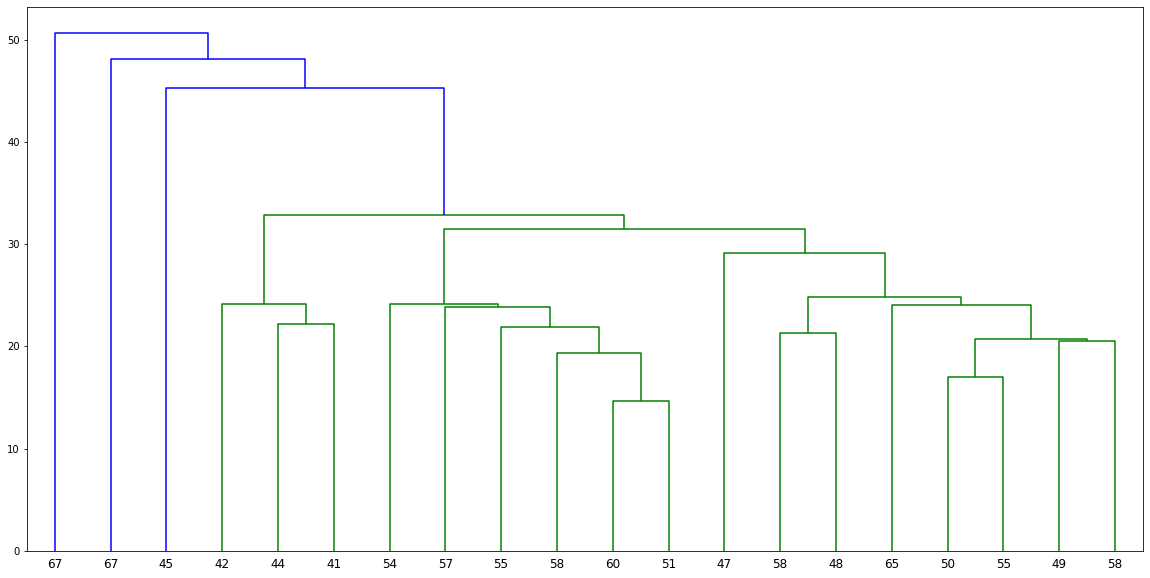

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()  

En las graficas de las agrupaciones jerarquicas se muestra la relacion  